**IMPORT DATASET**

In [1]:
import pandas as pd
data = pd.read_csv('C:/Users/dions/Music/data coding/mbkm1 label.csv',sep=';')
data = data[['score','text','sentimen']]
data.head()

,score,text,sentimen
0,1.0,"['aktif', 'kampus', 'merdeka', 'semester', 'po...",positive
1,2.0,"['alam', 'jurus', 'sasing', 'informasi', 'daft...",positive
2,2.0,"['alam', 'mbkm', 'program', 'kampus', 'ajar', ...",positive
3,-1.0,"['alam', 'sendiri', 'program', 'magang', 'mbkm...",negative
4,1.0,"['alam', 'teman', 'tukar', 'uang', 'saku', 'ca...",positive


In [2]:
len(data)

210

In [3]:
x = data['text']
y = data['sentimen']

In [4]:
# mapping, negative = 0, positive = 1
data['y'] = y.map({'negative':0, 'positive':1})
data['y'].head()

0    1
1    1
2    1
3    0
4    1
Name: y, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)

LabelEncoder()

In [6]:
data['sentimen'].value_counts()

positive    138
negative     72
Name: sentimen, dtype: int64

**Seleksi fitur Corr**

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(binary=True)
tfidf_mat = tf_idf.fit_transform(data["text"]).toarray()

In [8]:
tfidf = pd.DataFrame(tfidf_mat, columns=tf_idf.get_feature_names_out())
tfidf.head()

,absensi,acara,ada,adik,administratif,aduh,advokasi,ain,ajak,ajar,...,webnya,websitenya,wih,will,wisuda,worth,would,your,youtube,yudisium
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.123040,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.112561,...,0.0,0.0,0.0,0.0,0.0,0.26031,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.163727,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


In [9]:
tfidf.corr

<bound method DataFrame.corr of      absensi  acara  ada      adik  administratif  aduh  advokasi  ain  ajak  \
0        0.0    0.0  0.0  0.000000            0.0   0.0       0.0  0.0   0.0   
1        0.0    0.0  0.0  0.000000            0.0   0.0       0.0  0.0   0.0   
2        0.0    0.0  0.0  0.000000            0.0   0.0       0.0  0.0   0.0   
3        0.0    0.0  0.0  0.000000            0.0   0.0       0.0  0.0   0.0   
4        0.0    0.0  0.0  0.000000            0.0   0.0       0.0  0.0   0.0   
..       ...    ...  ...       ...            ...   ...       ...  ...   ...   
205      0.0    0.0  0.0  0.000000            0.0   0.0       0.0  0.0   0.0   
206      0.0    0.0  0.0  0.000000            0.0   0.0       0.0  0.0   0.0   
207      0.0    0.0  0.0  0.000000            0.0   0.0       0.0  0.0   0.0   
208      0.0    0.0  0.0  0.285989            0.0   0.0       0.0  0.0   0.0   
209      0.0    0.0  0.0  0.000000            0.0   0.0       0.0  0.0   0.0   

       

In [10]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [11]:
from sklearn.model_selection import train_test_split
df=data
X=tfidf
y=df['sentimen']
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42)
import seaborn as sns

- `X_train` dan `y_train` adalah subset yang akan digunakan untuk melatih model. Mereka akan digunakan untuk mempelajari pola pada data dan menciptakan model prediksi.
- `X_test` dan `y_test` adalah subset yang akan digunakan untuk menguji kinerja model. Setelah model dilatih, kita akan menguji kemampuannya untuk memprediksi label yang benar pada data baru dengan menggunakan subset ini. Proporsi test set ditentukan oleh argumen `test_size=0.2`, yang menunjukkan bahwa 20% dari dataset akan digunakan sebagai test set.
- Argumen `random_state=42` digunakan untuk mengatur seed (benih) generator angka acak. Ini penting untuk memastikan bahwa pemisahan dataset ini dapat direproduksi dengan cara yang sama jika kode ini dijalankan kembali.

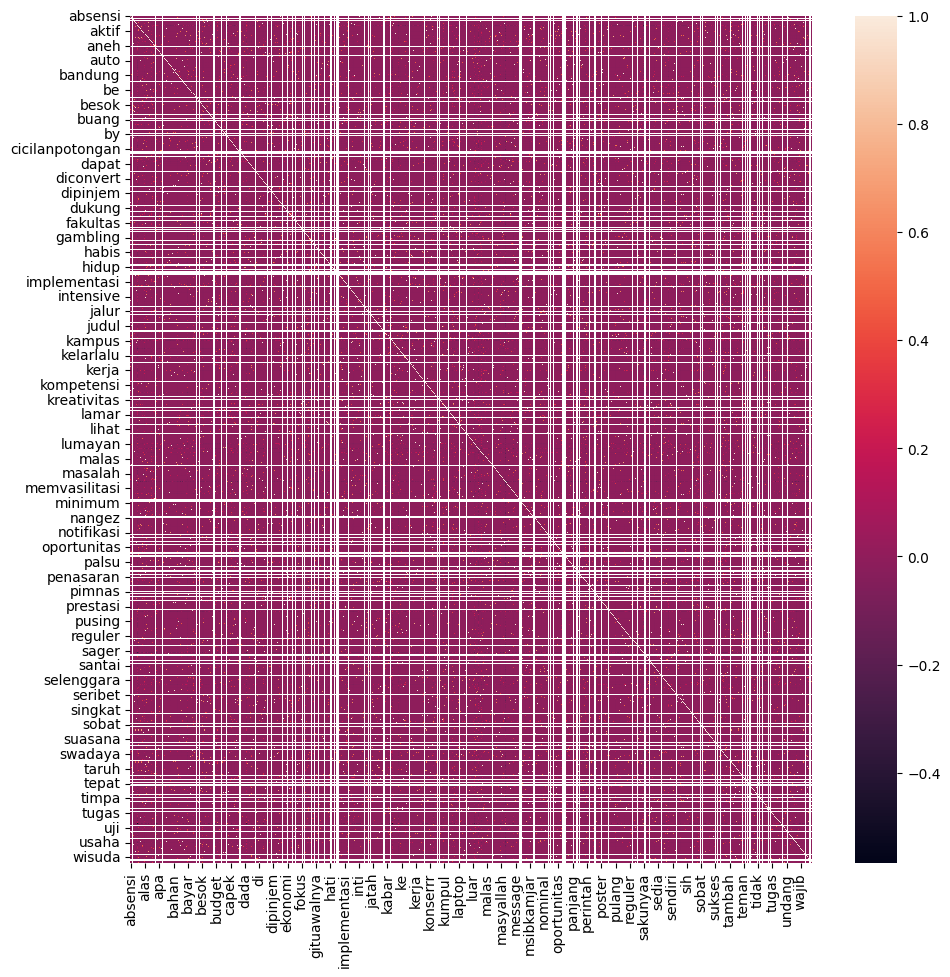

In [12]:
import matplotlib.pyplot as plt  
import seaborn as sns  
import numpy as np  
from sklearn.preprocessing import Normalizer  

corrmat = X_train.corr()  
fig, ax = plt.subplots()  
fig.set_size_inches(11,11)  
sns.heatmap(corrmat, linewidths=0)  # Set the linewidths parameter to 0

plt.show()  # Display the plot


In [13]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

363

Program di atas mencari fitur-fitur yang memiliki korelasi tinggi dengan menggunakan fungsi `correlation` dan memeriksa jumlah fitur-fitur tersebut menggunakan fungsi `len` dan `set`.

Berikut adalah penjelasan baris per baris dari program tersebut:

1. `corr_features = correlation(X_train, 0.9)`: Memanggil fungsi `correlation` dengan argumen `X_train` dan `0.9`. Fungsi ini digunakan untuk mencari fitur-fitur yang memiliki korelasi tinggi dengan nilai ambang batas sebesar 0.9. Hasil dari pemanggilan fungsi ini akan disimpan ke dalam variabel `corr_features`.

2. `len(set(corr_features))`: Menghitung jumlah fitur-fitur yang memiliki korelasi tinggi dengan menggunakan fungsi `len`. Fitur-fitur ini diperoleh dari `corr_features` yang merupakan hasil dari pemanggilan fungsi `correlation`. Sebelum dihitung, hasil dari `corr_features` dikonversi menjadi set menggunakan fungsi `set`, hal ini dilakukan untuk menghindari adanya duplikat fitur.

Singkatnya, program ini mencari fitur-fitur yang memiliki korelasi tinggi dengan menggunakan fungsi `correlation` dengan nilai ambang batas 0.9 dan kemudian menghitung jumlah fitur-fitur tersebut.

In [14]:
n = corr_features
len(n) #untuk menghitung jumlah karakter

363

In [15]:
tfidfn = tfidf.drop(corr_features,axis=1) #menghapus kolom
tfidfn.shape #menghitung baris dan kolom

(210, 498)

#Svm


In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score

In [17]:
train, test = train_test_split(data, test_size=0.2, random_state=42)
X_train = train['text'].values
X_test = test['text'].values
y_train = train['y']
y_test = test['y']

In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')

def tokenize(text):
    tknzr = TweetTokenizer()
    return tknzr.tokenize(text)

def stem(doc):
    english_stemmer = PorterStemmer()
    analyzer = tokenize(doc)
    return [english_stemmer.stem(w) for w in analyzer]

en_stopwords = set(stopwords.words("indonesian"))

vectorizer = CountVectorizer(
    analyzer='word',
    tokenizer=tokenize,
    lowercase=True,
    ngram_range=(1, 1),
    stop_words=en_stopwords
)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dions\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Validasi silang (cross validation) dan validasi terpisah (holdout validation) adalah dua metode yang digunakan dalam machine learning untuk mengevaluasi model. Perbedaan antara keduanya adalah sebagai berikut:

1. Pemisahan data: 
   - Validasi silang: Data dibagi menjadi beberapa bagian (folds), biasanya terdiri dari k-fold (misalnya 5-fold atau 10-fold). Setiap fold digunakan sebagai data uji satu kali dan sisanya sebagai data latih.
   - Validasi terpisah: Data dibagi menjadi dua bagian, yaitu data latih dan data uji. Biasanya, sebagian besar data digunakan sebagai data latih (misalnya 70-80% dari total data) dan sisanya sebagai data uji.

2. Penggunaan data:
   - Validasi silang: Semua data digunakan baik sebagai data latih maupun data uji dalam iterasi yang berbeda-beda. Hal ini memastikan bahwa setiap sampel data digunakan untuk evaluasi model.
   - Validasi terpisah: Hanya ada satu pemisahan data antara data latih dan data uji. Data latih digunakan untuk melatih model, sedangkan data uji digunakan untuk menguji performa model yang sudah dilatih.

3. Evaluasi model:
   - Validasi silang: Performa model diukur dengan menghitung rata-rata hasil pengujian pada setiap iterasi. Hasil evaluasi juga dapat dilakukan menggunakan metrik seperti akurasi, presisi, recall, dll.
   - Validasi terpisah: Performa model dievaluasi berdasarkan hasil pengujian pada data uji yang terpisah. Metrik yang sama seperti akurasi, presisi, recall, dll dapat digunakan untuk evaluasi.

4. Penggunaan data uji:
   - Validasi silang: Data uji bergantian di setiap iterasi sehingga semua sampel data memiliki kesempatan menjadi data uji.
   - Validasi terpisah: Data uji tetap konsisten dan tidak berubah sepanjang evaluasi. Hal ini memastikan bahwa model hanya dievaluasi pada satu set data uji yang tetap.

Dengan demikian, perbedaan utama antara validasi silang dan validasi terpisah adalah pada pemisahan data dan penggunaan data uji yang berbeda. Validasi silang memberikan estimasi performa yang lebih terpercaya dengan memanfaatkan semua data dalam evalusi, sementara validasi terpisah lebih sederhana dengan menggunakan pemisahan data yang lebih langsung.

In [19]:
kfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
np.random.seed(1)
vectorizer = CountVectorizer()

pipeline_svm = make_pipeline(vectorizer,
                            SVC(probability=True, kernel="rbf", class_weight="balanced"))
param_grid = {'svc__C': [0.01, 0.1, 1]}
grid_svm = GridSearchCV(pipeline_svm,
                    param_grid = param_grid,
                    cv = kfolds,
                    scoring="roc_auc",
                    verbose=1,
                    n_jobs=-1)
# grid_svm.fit(X_train)
grid_svm.fit(X_train, y_train)
grid_svm.score(X_test, y_test)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


0.9835294117647059

In [20]:
grid_svm.best_params_

{'svc__C': 1}

In [21]:
grid_svm.best_score_

0.9344080923028292

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, f1_score, precision_score, recall_score


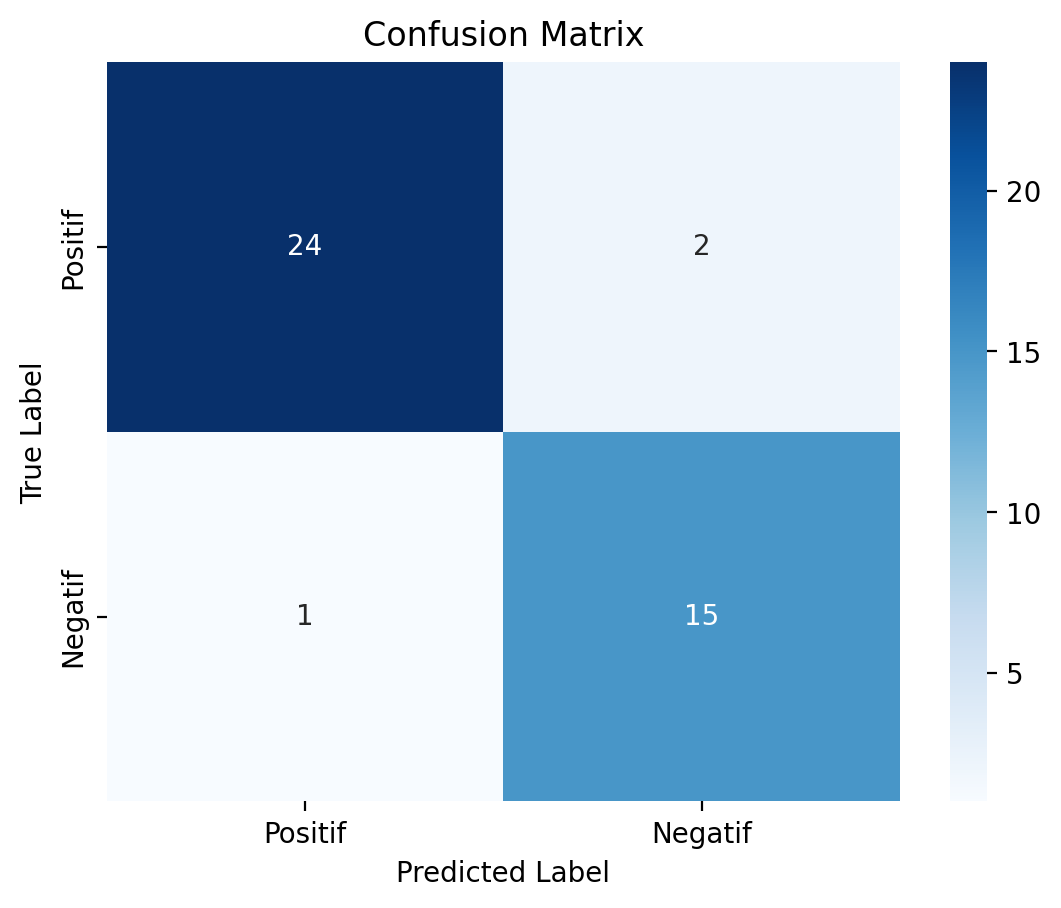

{'auc': 0.9835294117647059,
 'f1': 0.9411764705882353,
 'acc': 0.9285714285714286,
 'precision': 0.9230769230769231,
 'recall': 0.96}

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, f1_score, precision_score, recall_score

def report_results(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    pred = model.predict(X)

    auc = roc_auc_score(y, pred_proba)
    acc = accuracy_score(y, pred)
    f1 = f1_score(y, pred)
    prec = precision_score(y, pred)
    rec = recall_score(y, pred)
    result = {'auc': auc, 'f1': f1, 'acc': acc, 'precision': prec, 'recall': rec}
    
    cm = confusion_matrix(y, pred)
    labels = ["Positif", "Negatif"] 

    # Ubah posisi TP dan TN pada confusion matrix
    new_cm = [[cm[1, 1], cm[0, 1]], [cm[1, 0], cm[0, 0]]]

    # Menampilkan heatmap untuk confusion matrix
    sns.heatmap(new_cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    return result

# Panggil fungsi report_results dengan model grid_svm.best_estimator_, X_test, dan y_test sebagai argumen
report_results(grid_svm.best_estimator_, X_test, y_test)


In [24]:
def get_roc_curve(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, pred_proba)
    return fpr, tpr

In [25]:
roc_svm = get_roc_curve(grid_svm.best_estimator_, X_test, y_test)

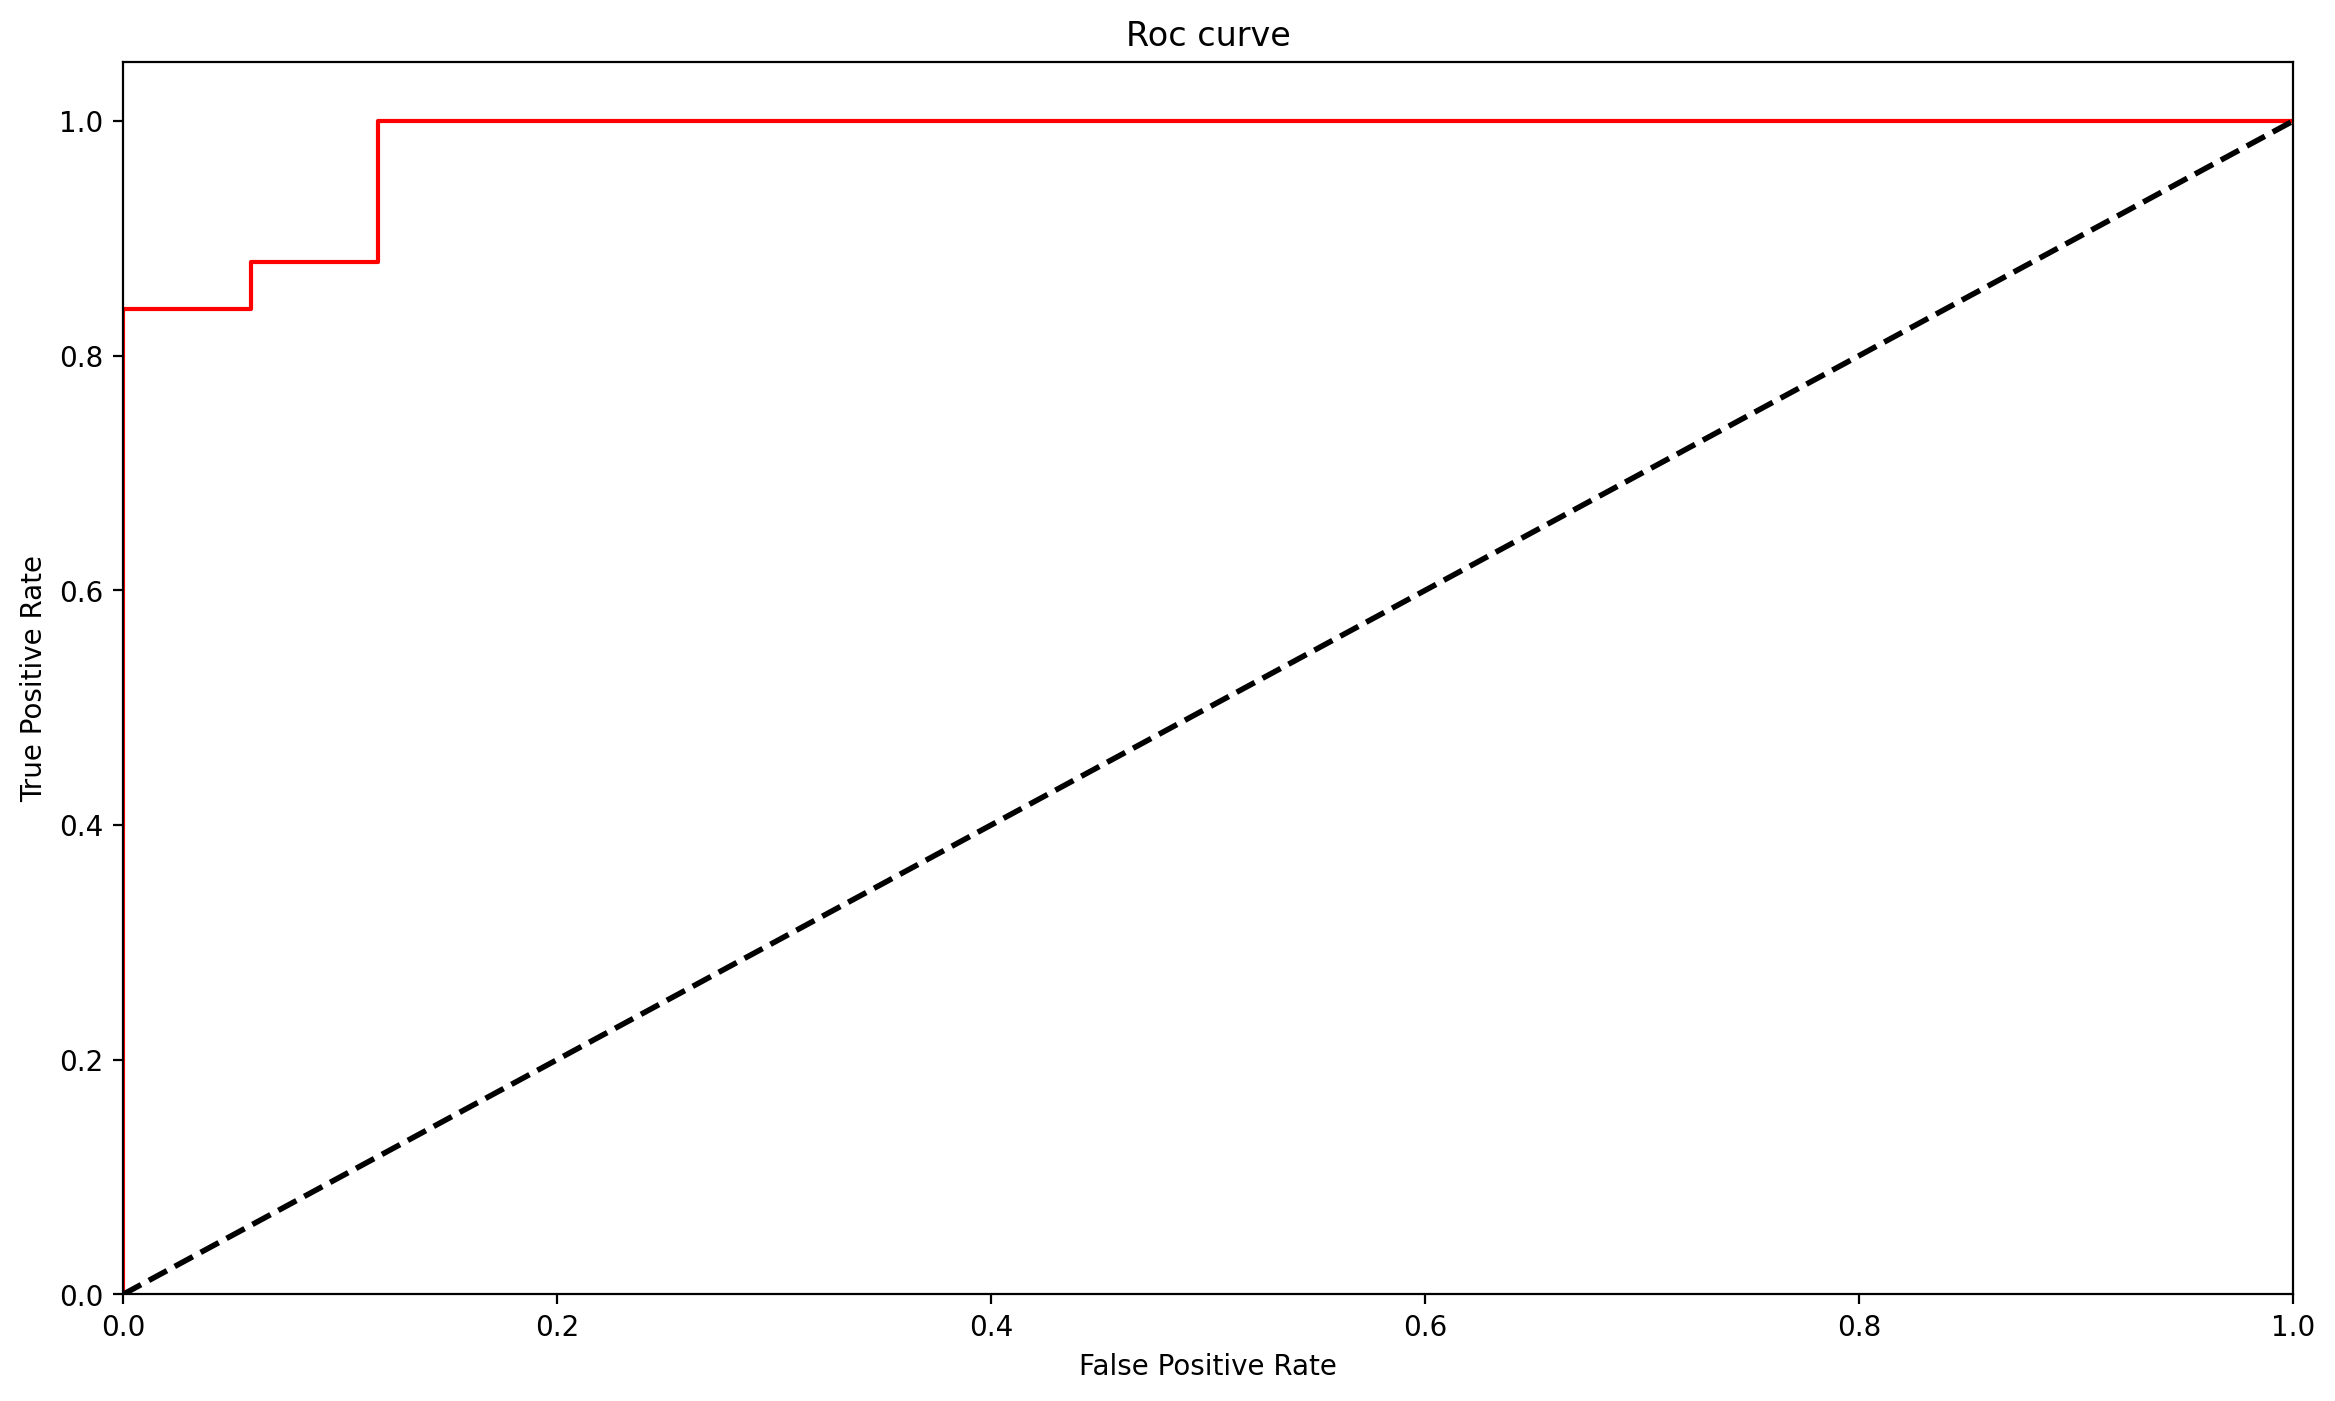

In [26]:
fpr, tpr = roc_svm
plt.figure(figsize=(14,8))
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve')
plt.show()

Dengan melihat ROC curve, kita dapat:

1. Mengukur kemampuan model dalam memisahkan kelas positif dan negatif. Semakin tinggi garis ROC curve ke sudut kiri atas, semakin baik performa model.
2. Menentukan threshold optimal yang dapat menghasilkan keseimbangan antara TPR dan FPR, tergantung pada kebutuhan bisnis atau preferensi pengguna.
3. Membandingkan kinerja model yang berbeda dalam memprediksi kelas positif dan negatif.

Secara keseluruhan, ROC curve berguna untuk memberikan gambaran yang lebih lengkap tentang keunggulan kinerja model klasifikasi biner dibandingkan dengan hanya melihat confusion matrix dan metrik evaluasi lainnya.

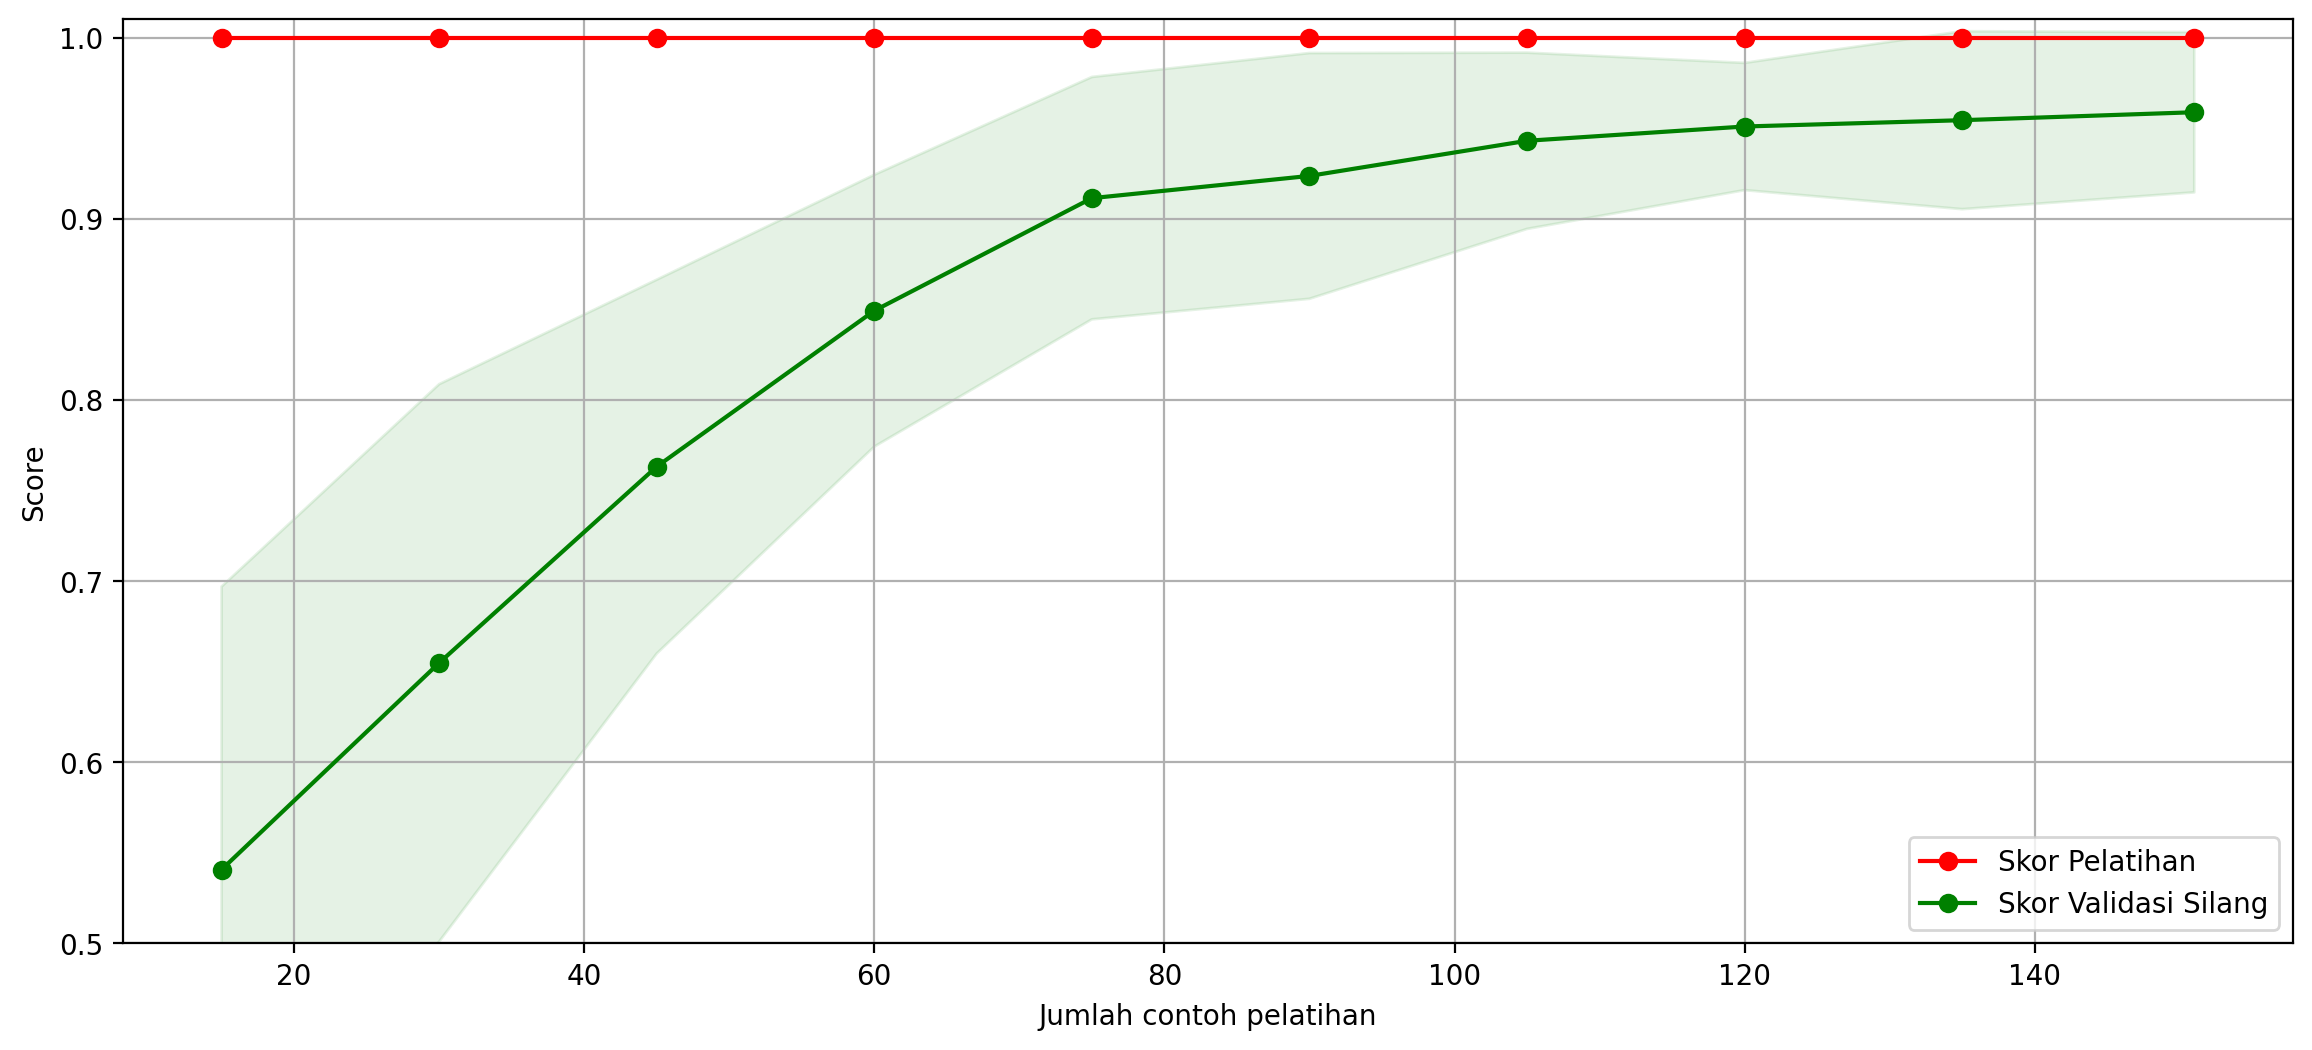

In [33]:
# Mengimpor library yang diperlukan
from sklearn.model_selection import learning_curve

# Membuat data learning curve menggunakan fungsi learning_curve dari sklearn
# grid_svm.best_estimator_ mewakili estimator/model terbaik yang diperoleh dari grid search
# X_train dan y_train adalah data pelatihan
# cv=10 menentukan jumlah lipatan cross-validation
# n_jobs=-1 menunjukkan komputasi paralel
# scoring="roc_auc" menentukan metrik evaluasi yang digunakan untuk scoring
# train_sizes=np.linspace(.1, 1.0, 10) menentukan proporsi data pelatihan yang akan digunakan dalam setiap iterasi
# random_state=42 mengatur seed acak untuk reproducibility
train_sizes, train_scores, test_scores = \
    learning_curve(grid_svm.best_estimator_, X_train, y_train, cv=10, n_jobs=-1,
                   scoring="roc_auc", train_sizes=np.linspace(.1, 1.0, 10), random_state=42)

# Mendefinisikan fungsi untuk memplot learning curve
def plot_learning_curve(X, y, train_sizes, train_scores, test_scores, title='', ylim=None, figsize=(14,8)):
    # Membuat figure dan mengatur judul serta label sumbu y
    plt.figure(figsize=figsize)
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Jumlah contoh pelatihan")
    plt.ylabel("Score")

    # Menghitung mean dan standar deviasi dari skor pelatihan dan pengujian
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    # Mengisi area antara garis yang mewakili mean score ditambah/minus satu standar deviasi
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # Memplot mean score untuk data pelatihan dan pengujian
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Skor Pelatihan")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Skor Validasi Silang")

    # Menambahkan legenda pada plot
    plt.legend(loc="lower right")
    return plt

# Memanggil fungsi plot_learning_curve dan menampilkan plot
plot_learning_curve(X_train, y_train, train_sizes,
                    train_scores, test_scores, ylim=(0.5, 1.01), figsize=(14,6))
plt.show()


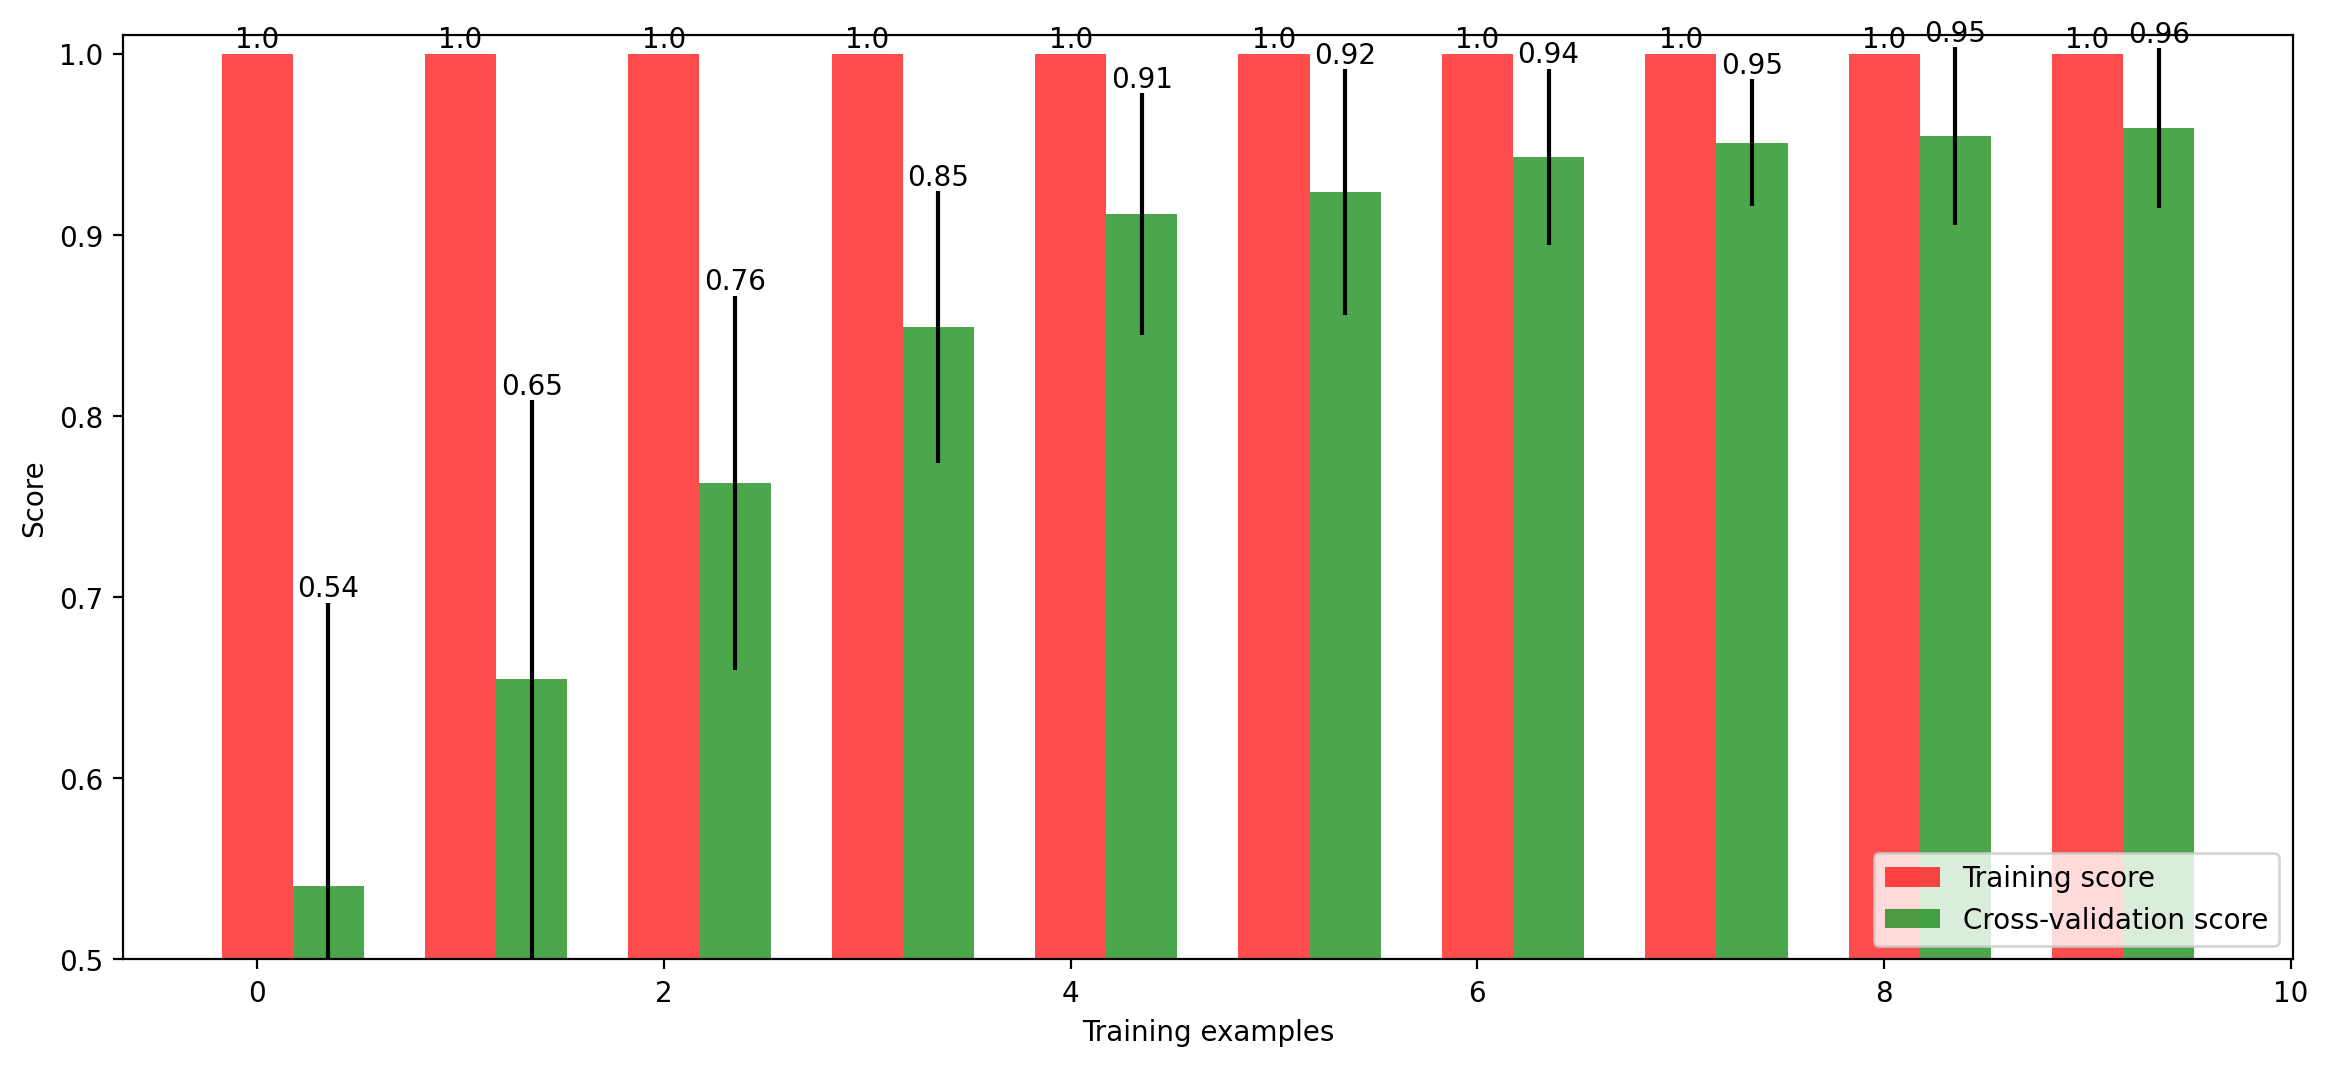

In [31]:
# Impor library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt

# Memperoleh kurva pembelajaran dengan menggunakan fungsi learning_curve
train_sizes, train_scores, test_scores = \
    learning_curve(grid_svm.best_estimator_, X_train, y_train, cv=10, n_jobs=-1,
                   scoring="roc_auc", train_sizes=np.linspace(.1, 1.0, 10), random_state=42)

# Mendefinisikan fungsi untuk menggambar kurva pembelajaran dalam bentuk bar plot
def plot_learning_curve(X, y, train_sizes, train_scores, test_scores, title='', ylim=None, figsize=(14,8)):

    # Membuat plot dengan ukuran tertentu dan judul
    plt.figure(figsize=figsize)
    plt.title(title)
    
    # Menentukan batas sumbu y jika diberikan
    if ylim is not None:
        plt.ylim(*ylim)
    
    # Memberi label pada sumbu x dan y
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # Menghitung mean dan standar deviasi dari skor pelatihan dan validasi silang
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # Menghitung lebar bar plot berdasarkan ukuran train_sizes
    bar_width = 0.35
    
    # Mengatur posisi x pada bar plot
    train_pos = np.arange(len(train_sizes))
    test_pos = train_pos + bar_width
    
    # Menggambar bar plot untuk skor pelatihan dan validasi silang rata-rata
    plt.bar(train_pos, train_scores_mean, width=bar_width, yerr=train_scores_std,
            alpha=0.7, color='r', label='Training score')
    
    plt.bar(test_pos, test_scores_mean, width=bar_width, yerr=test_scores_std,
            alpha=0.7, color='g', label='Cross-validation score')

    # Menampilkan jumlah skor pada setiap bar plot
    for i in range(len(train_sizes)):
        plt.text(train_pos[i], train_scores_mean[i] + train_scores_std[i], round(train_scores_mean[i], 2),
                 ha='center', va='bottom')
        plt.text(test_pos[i], test_scores_mean[i] + test_scores_std[i], round(test_scores_mean[i], 2),
                 ha='center', va='bottom')
    
    # Menampilkan legenda pada posisi kanan bawah
    plt.legend(loc="lower right")
    
    # Menyimpan plot dalam file gambar jika diperlukan
    # plt.savefig("learning_curve.png")
    
    # Menampilkan plot
    plt.show()

# Memanggil fungsi plot_learning_curve untuk menggambar kurva pembelajaran dalam bentuk bar plot
plot_learning_curve(X_train, y_train, train_sizes,
                    train_scores, test_scores, ylim=(0.5, 1.01), figsize=(14,6))


In [34]:
hasil_prediksi = grid_svm.predict(["mbkm benefitnya selain ilmu dapat uang saku"])

if hasil_prediksi[0] == 0:
    hasil_akhir = "Sentimen Negatif"
elif hasil_prediksi[0] == 1:
    hasil_akhir = "Sentimen Positif"
else:
    hasil_akhir = "tidak diketahui"

print(hasil_akhir)


Sentimen Positif


In [35]:
X = tfidfn.values
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.26031017, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [36]:
label = np.where(data['sentimen']=='positive', 1, 0) #evaluasi kondisi jika kondisi benar dalam label 1 dan salah 0
y = label
y[100:120] #mengambil sebagian elemen dari array y

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [37]:
from sklearn import model_selection, svm
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

from scipy.sparse import csr_matrix as matrixTransform

In [38]:
class myClass:
    def __init__(self):
        self.recall = 0
        self.acc = 0
        self.pres = 0
    def getRecall(self):
        return self.recall
    def getPres(self):
        return self.pres
    def setRecall(self, recall):
        self.recall = recall
    def setPres(self, pres):
        self.pres = pres

In [39]:
def classify2():

    SVM = svm.SVC(C=1, gamma='scale', kernel='sigmoid', probability=True)
    SVM.fit(Train_X_final, y_train)
    predictions_SVM = SVM.predict(Test_X_final)

    acc = accuracy_score(predictions_SVM, y_test)
    CM = confusion_matrix(y_test, predictions_SVM)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    try :
        pres = TP/(TP+FP)
    except :
        pres = 0
    accu = (TP+TN)/(TP+FP+TN+FN)
    recall = TP/(TP+FN)

    acc = accuracy_score(y_test, predictions_SVM)
    recll = recall_score(y_test, predictions_SVM)
    prec = precision_score(y_test, predictions_SVM)

    obj.setRecall(recall)
    obj.setPres(pres)

    print("Confusion Matrix")
    print(CM)
    return accu

In [40]:
obj = myClass()
acc_scores = []
presisi_scores = []
recall_scores = []
cv = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

    Test_X_final = matrixTransform(X_test)
    Train_X_final = matrixTransform(X_train)
    print("Data Train :", len(X_train))
    print("Data Test :", len(X_test))

    acc= classify2()
    acc_scores.append(acc)
    presisi_scores.append(obj.getPres())
    recall_scores.append(obj.getRecall())

Data Train : 189
Data Test : 21
Confusion Matrix
[[ 9  1]
 [ 0 11]]
Data Train : 189
Data Test : 21
Confusion Matrix
[[ 7  0]
 [ 0 14]]
Data Train : 189
Data Test : 21
Confusion Matrix
[[ 5  2]
 [ 0 14]]
Data Train : 189
Data Test : 21
Confusion Matrix
[[ 3  5]
 [ 0 13]]
Data Train : 189
Data Test : 21
Confusion Matrix
[[ 6  2]
 [ 0 13]]
Data Train : 189
Data Test : 21
Confusion Matrix
[[ 5  0]
 [ 2 14]]
Data Train : 189
Data Test : 21
Confusion Matrix
[[ 5  3]
 [ 2 11]]
Data Train : 189
Data Test : 21
Confusion Matrix
[[ 4  1]
 [ 0 16]]
Data Train : 189
Data Test : 21
Confusion Matrix
[[ 3  4]
 [ 0 14]]
Data Train : 189
Data Test : 21
Confusion Matrix
[[ 5  2]
 [ 0 14]]


Jika FN (False Negative) adalah 1 dalam confusion matrix, itu berarti ada satu kasus positif yang salah diklasifikasikan sebagai negatif. Ini umumnya terjadi ketika algoritma atau model yang digunakan gagal mengenali suatu kasus yang sebenarnya positif.

Dalam beberapa konteks, seperti dalam pengujian medis, FN dapat memiliki konsekuensi serius karena dapat menyebabkan kesalahan diagnosis atau penanganan yang tidak memadai untuk kondisi yang sebenarnya positif. 

Namun, dampak dari FN bergantung pada aplikasi atau skenario yang spesifik. Dalam beberapa kasus, satu FN mungkin tidak terlalu signifikan, sementara dalam kasus lain, satu FN mungkin sangat penting dan harus diminimalkan.

Apakah ada yang bisa saya bantu lagi?

In [54]:
print("Pengujian SVM 9 k-fold cross validation")
print("Accuracy :", acc_scores)
print("Presisi :", presisi_scores)
print("Recall :", recall_scores)
print("Accuracy Average :", np.mean(acc_scores))
print("Presisi Average :", np.mean(presisi_scores))
print("Recall Average :", np.mean(recall_scores))

Pengujian SVM 9 k-fold cross validation
Accuracy : [0.9523809523809523, 1.0, 0.9047619047619048, 0.7619047619047619, 0.9047619047619048, 0.9047619047619048, 0.7619047619047619, 0.9523809523809523, 0.8095238095238095, 0.9047619047619048]
Presisi : [0.9166666666666666, 1.0, 0.875, 0.7222222222222222, 0.8666666666666667, 1.0, 0.7857142857142857, 0.9411764705882353, 0.7777777777777778, 0.875]
Recall : [1.0, 1.0, 1.0, 1.0, 1.0, 0.875, 0.8461538461538461, 1.0, 1.0, 1.0]
Accuracy Average : 0.8857142857142856
Presisi Average : 0.8760224089635855
Recall Average : 0.9721153846153847


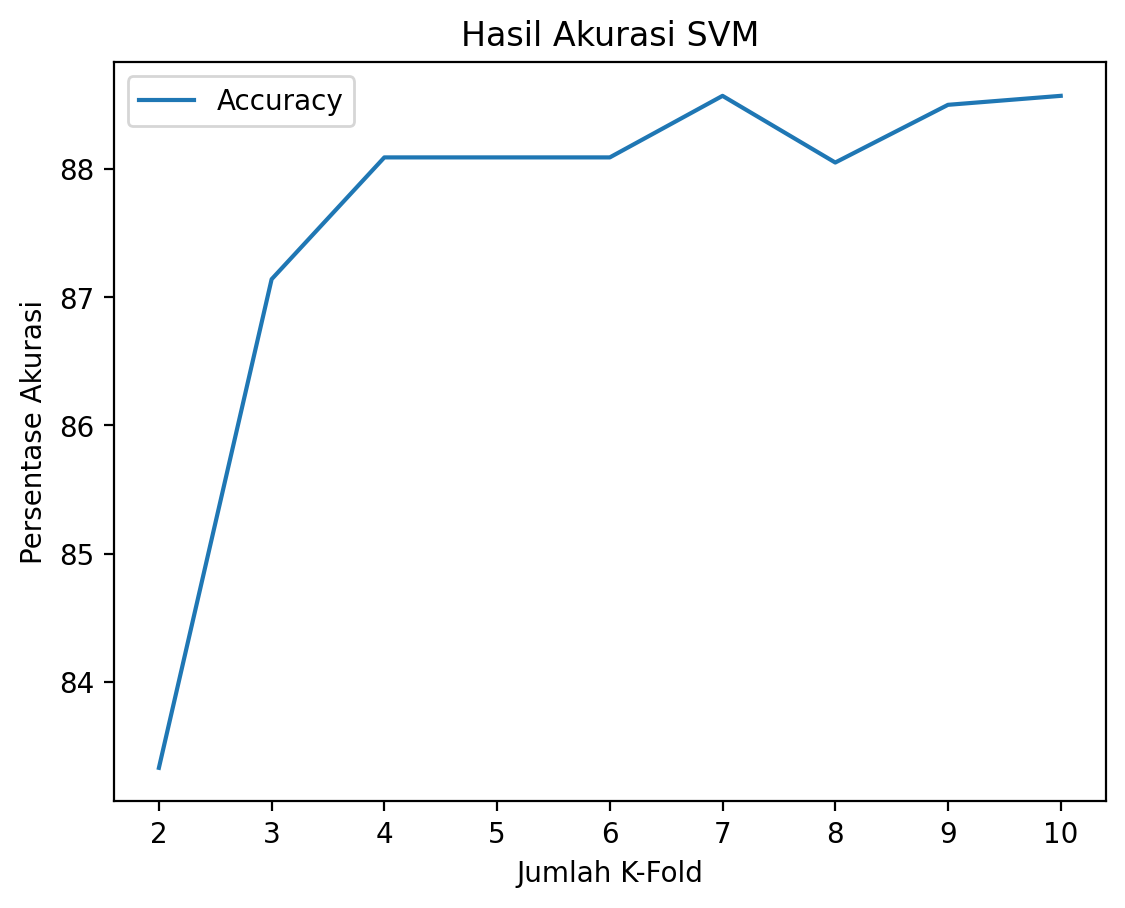

In [42]:
import matplotlib.pyplot as plt
# line 2 points
x1 = [2,3,4,5,6,7,8,9,10]
y1 = [83.33, 87.14, 88.09, 88.09, 88.09, 88.57, 88.05, 88.50, 88.57]
# plotting the line 2 points
plt.plot(x1, y1, label = "Accuracy")

# naming the x axis
plt.xlabel('Jumlah K-Fold')
# naming the y axis
plt.ylabel('Persentase Akurasi')
# giving a title to my graph
plt.title('Hasil Akurasi SVM')

# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()
